## **Module** **3**
# House Prices EDA Challenge

El challenge para este módulo consistirá en poner en práctica los conocimientos relacionados con el Exploratory Data Analysis aplicados a datos relacionados al mercado inmobiliario. Utiliza el dataset houseprices.csv para realizar las actividades (File data_description.txt contiene el detalle de los valores del dataset):

1.-Obtener la información general del dataset (tipo de datos, conteo de columnas, información relevante que deseé informar).

2.-Obtener la distribución de los precios utilizando las medidas de tendencia central y graficar histograma de los precios (Hint - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html).

3.-Existe correlación entre el precio de vivienda y otros valores? Obtener correlación posibles valores de interés con respecto al precio de vivienda(Hint - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

4.-Hasta este momento no se había considerado la detección de Outliers. Una manera de detectarlos fácilmente es graficando. Realizar los siguientes pasos (Al graficar se detectará un outlier en común, lo cual facilitará su limpieza a lo largo del dataset):


*   Graficar las diferentes columnas numéricas para observar outliers
*   Eliminar outliers

5.-Recalcular la correlación después de descartar los outliers. ¿Existe un cambio significativo en este parámetro? ¿A qué conclusiones se pueden llegar con el trabajo hecho hasta este momento? 


In [2]:
%matplotlib inline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [3]:
df = pd.read_csv('houseprices.csv')
df.Id = df.Id.astype('object')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_tipos = pd.DataFrame(df.dtypes)

In [5]:
df_tipos[0].value_counts()

object     44
int64      34
float64     3
Name: 0, dtype: int64

In [6]:
df_tipos[df_tipos[0] == 'object']

,0
Id,object
MSZoning,object
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object
LandSlope,object
Neighborhood,object


In [7]:
df_tipos[df_tipos[0] == 'int']

,0
MSSubClass,int64
LotArea,int64
OverallQual,int64
OverallCond,int64
YearBuilt,int64
YearRemodAdd,int64
BsmtFinSF1,int64
BsmtFinSF2,int64
BsmtUnfSF,int64
TotalBsmtSF,int64


In [8]:
df_tipos[df_tipos[0] == 'float']

,0
LotFrontage,float64
MasVnrArea,float64
GarageYrBlt,float64


In [8]:
pd.DataFrame(df.isnull().sum()).sort_values(0,ascending=False).head(20)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [9]:
df.shape

(1460, 81)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [11]:
df.describe(include='object').T

,count,unique,top,freq
Id,1460,1460,1,1
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225


In [12]:
nulos = pd.DataFrame(df.isnull().sum())
nulos

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


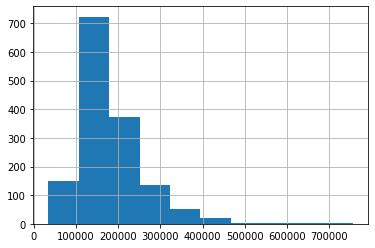

In [13]:
df.SalePrice.hist();

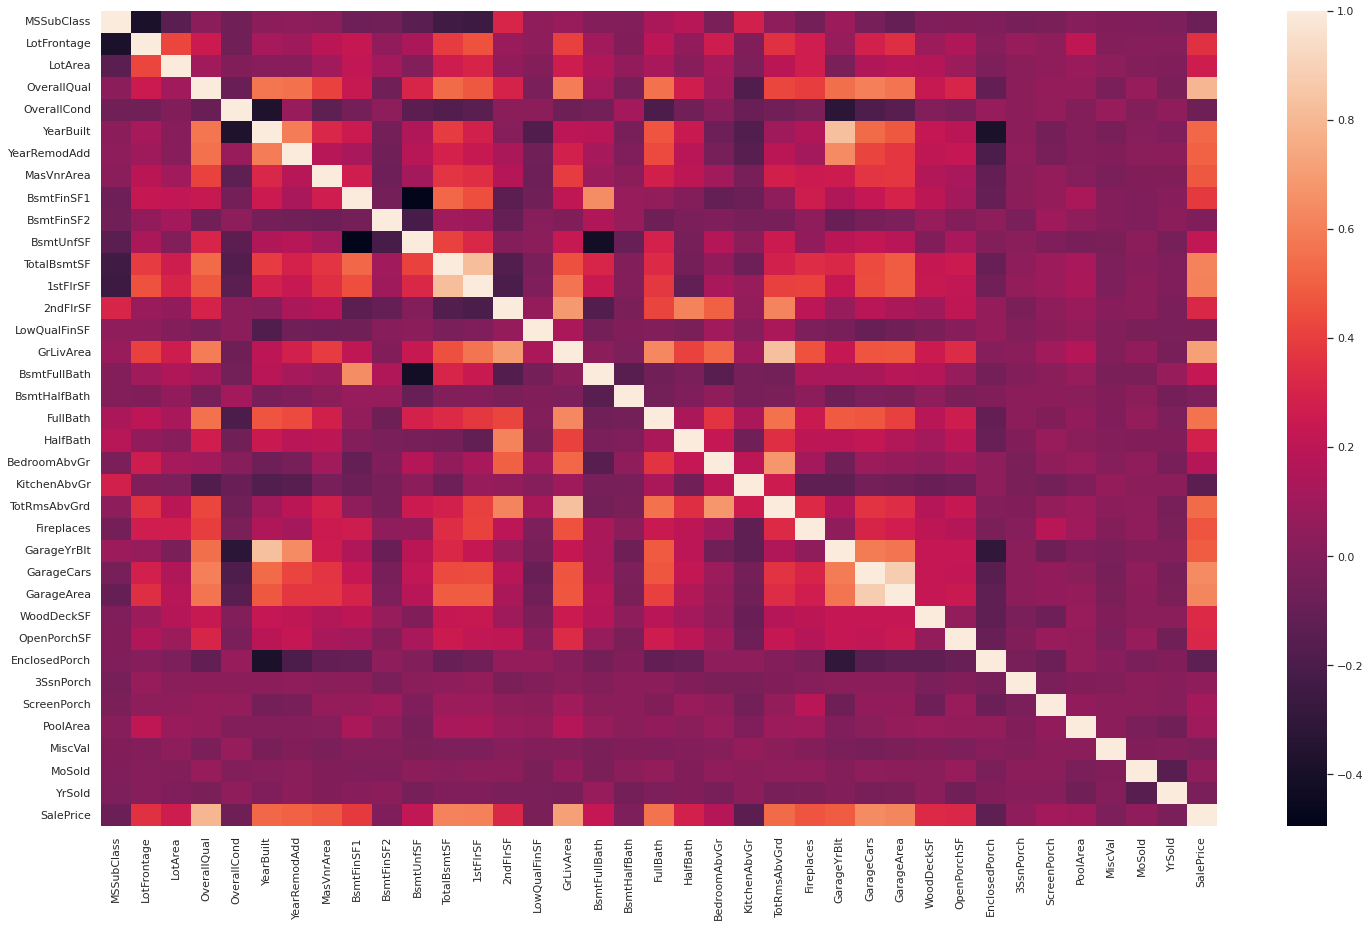

In [14]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.set(rc = {'figure.figsize':(25,15)})

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [16]:
columnas = list(df.columns)
columnas.sort()
columnas

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle

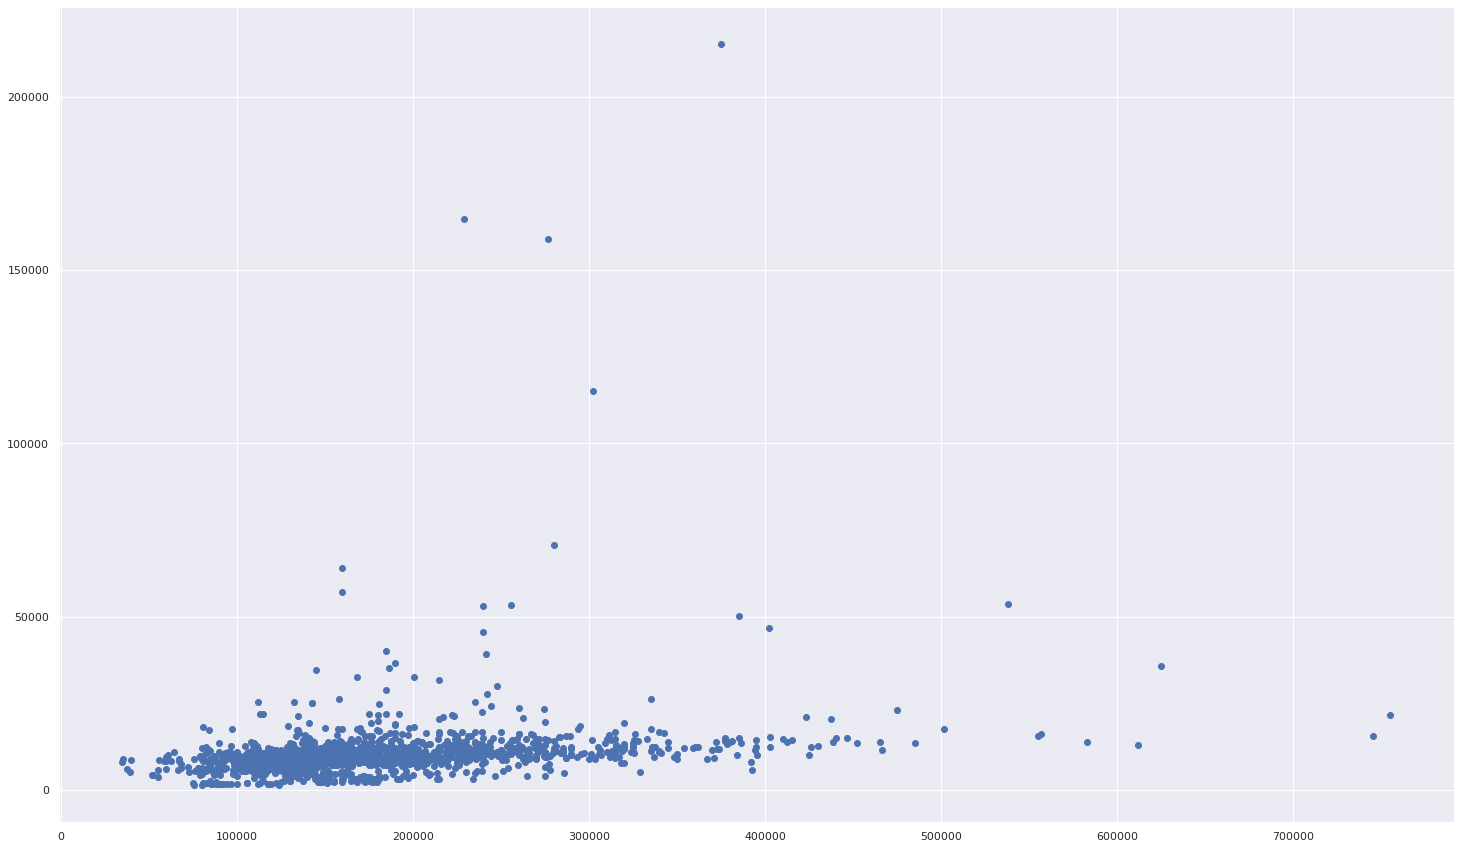

In [45]:
plt.scatter(df['SalePrice'], df['LotArea'])
 
# To show the plot
plt.show()

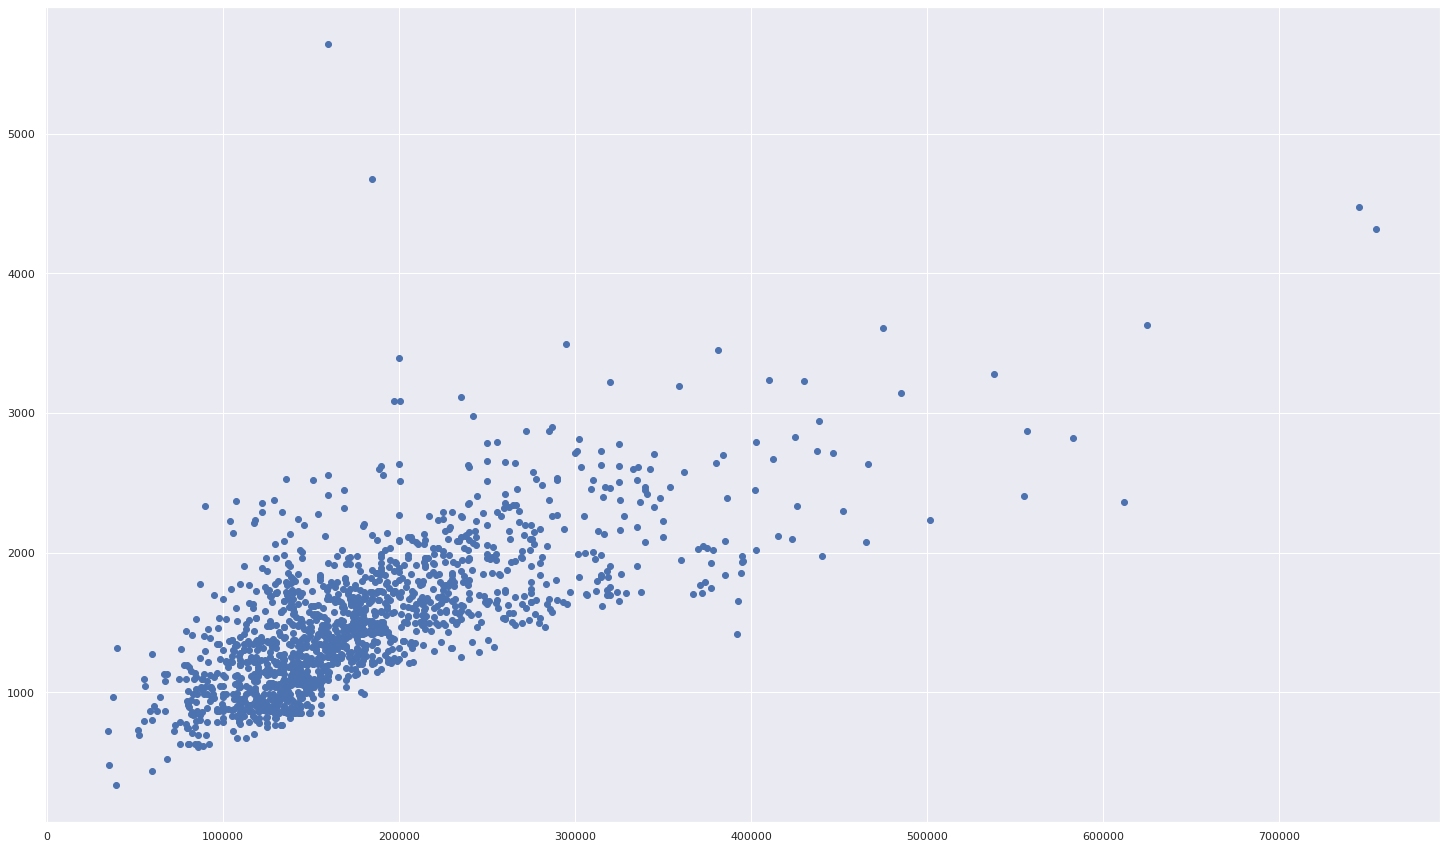

In [17]:
plt.scatter(df['SalePrice'], df['GrLivArea'])
 
# To show the plot
plt.show()

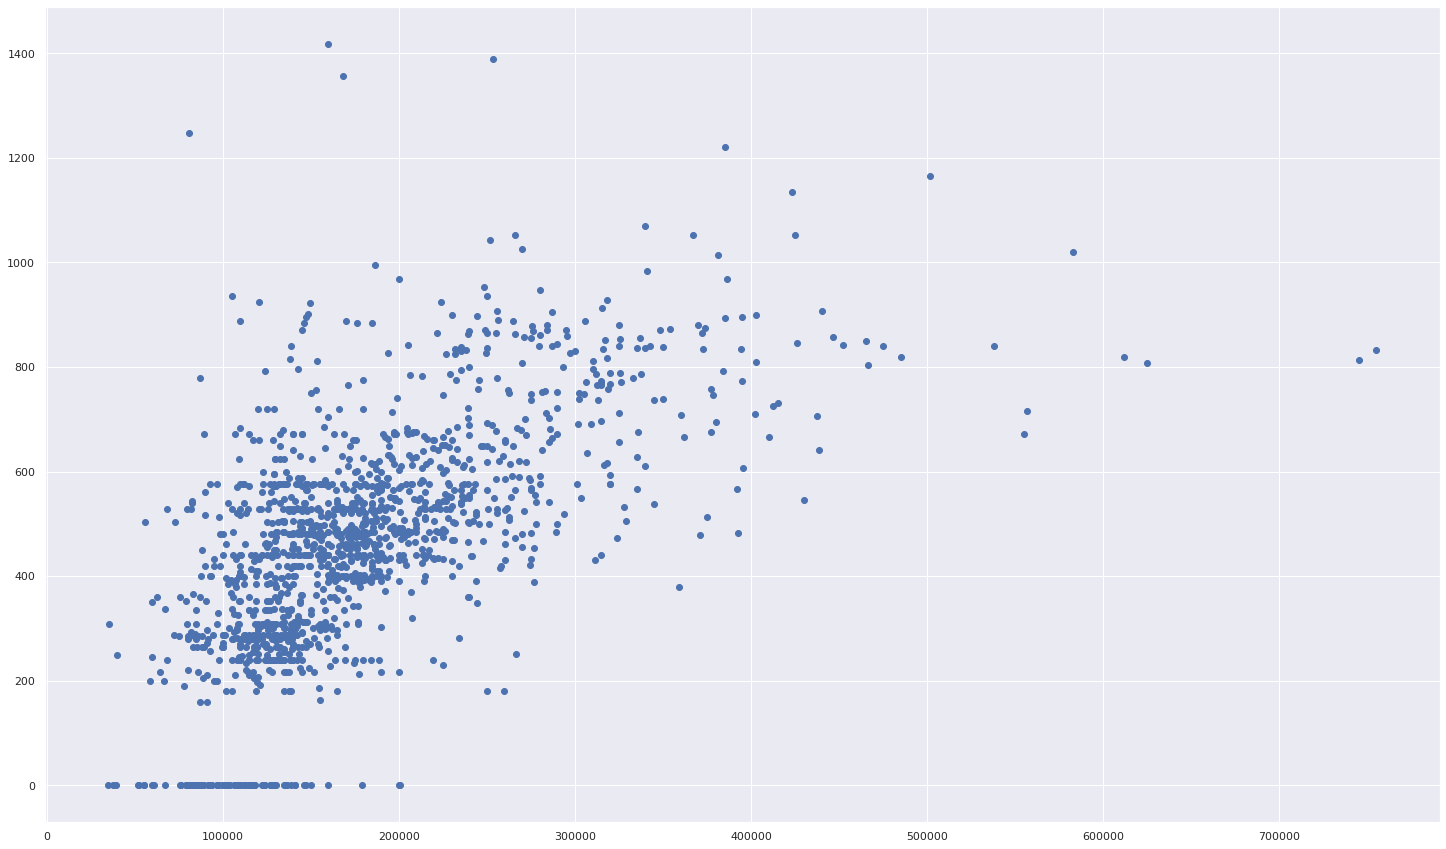

In [18]:
plt.scatter(df['SalePrice'], df['GarageArea'])
 
# To show the plot
plt.show()

In [40]:
float_int_columns = []
for columna,tipo in zip(pd.DataFrame(df.dtypes).index,pd.DataFrame(df.dtypes)[0]):
    if 'float' in str(tipo) or 'int' in str(tipo):
        float_int_columns.append(columna)

In [41]:
df_float_int = df[float_int_columns]

In [42]:
df_float_int.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


/home/no/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


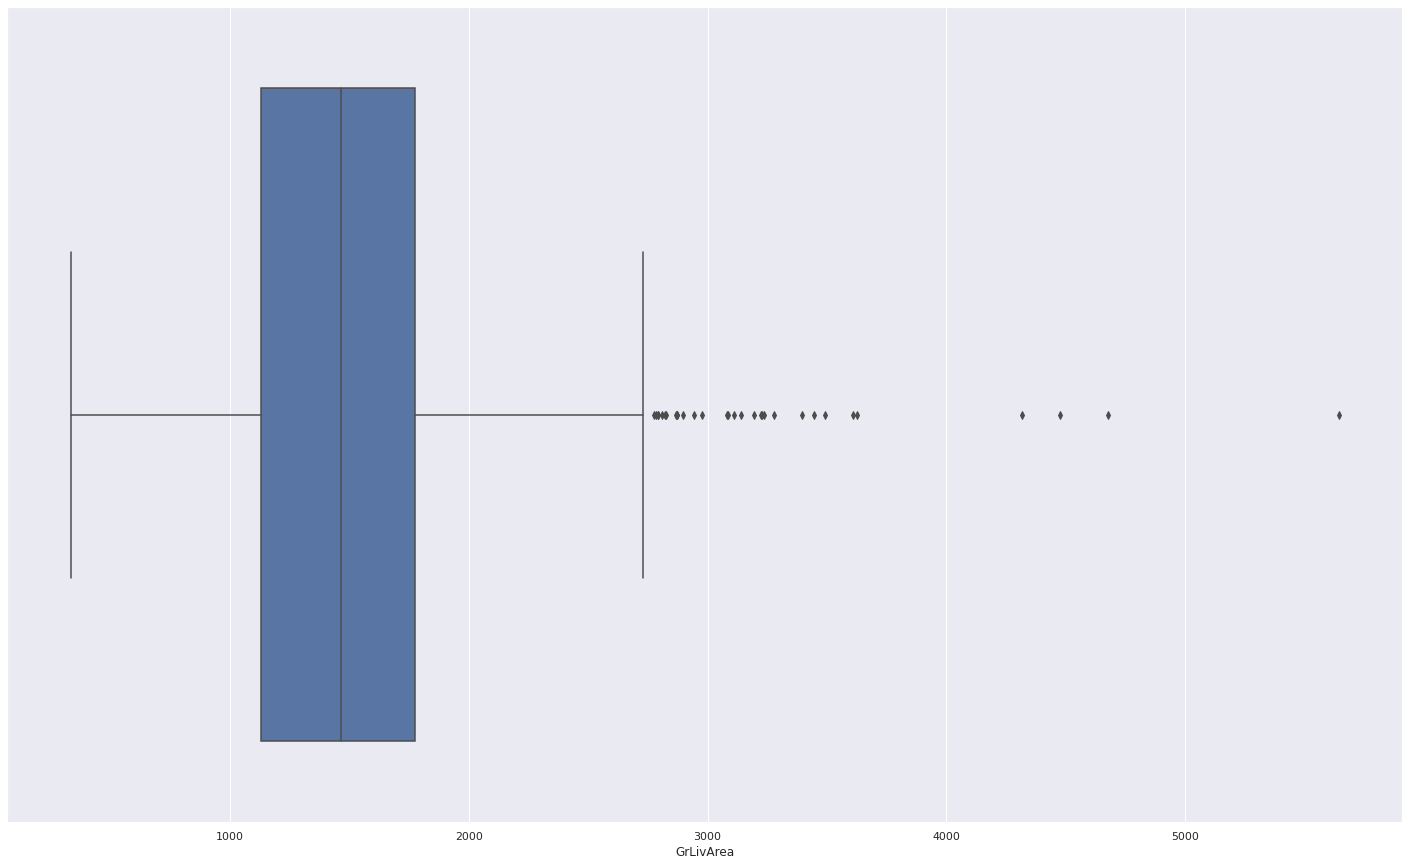

In [44]:
sns.boxplot(df_float_int['GrLivArea']);

/home/no/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


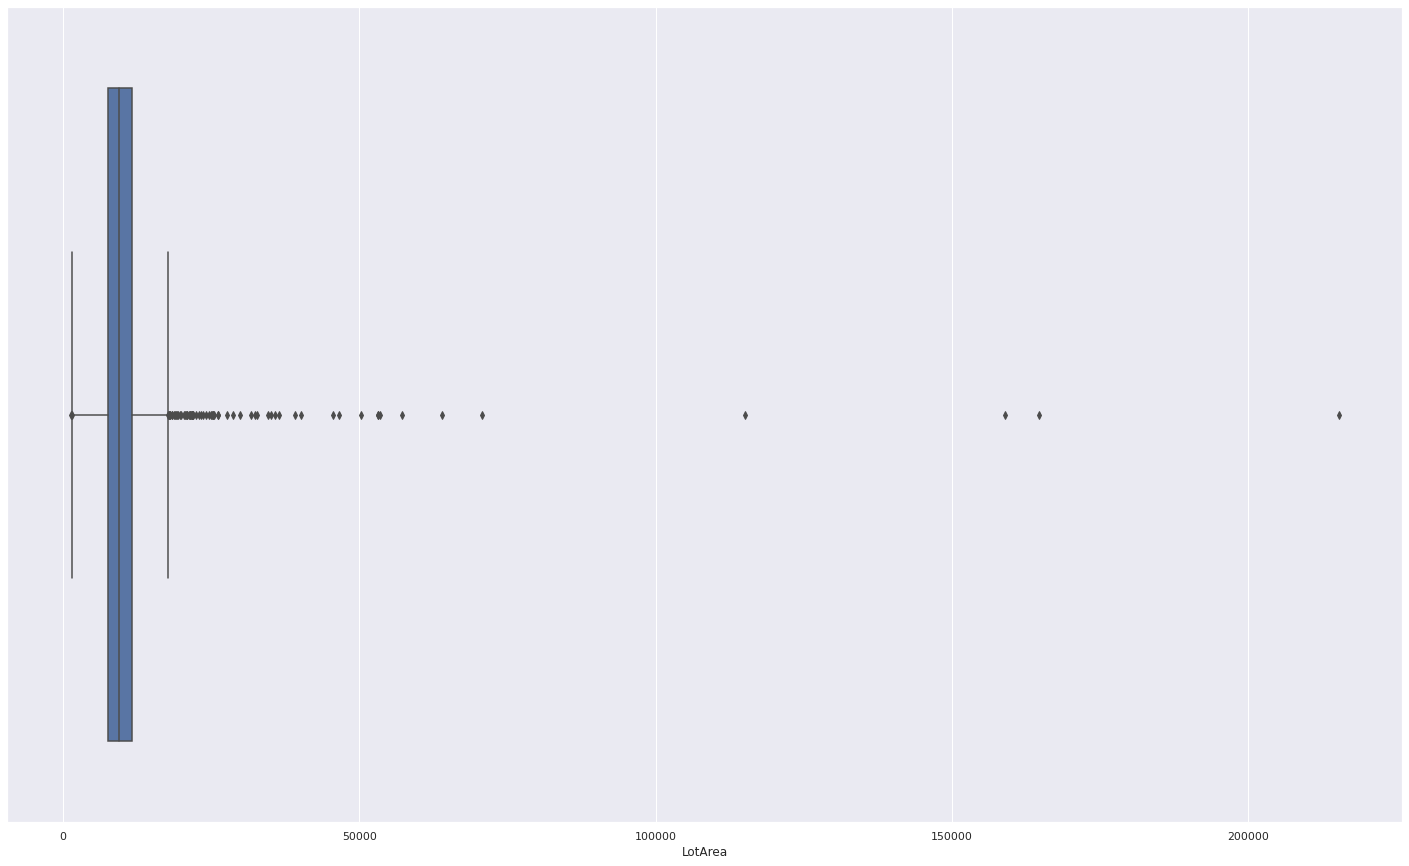

In [46]:
sns.boxplot(df_float_int['LotArea']);

/home/no/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


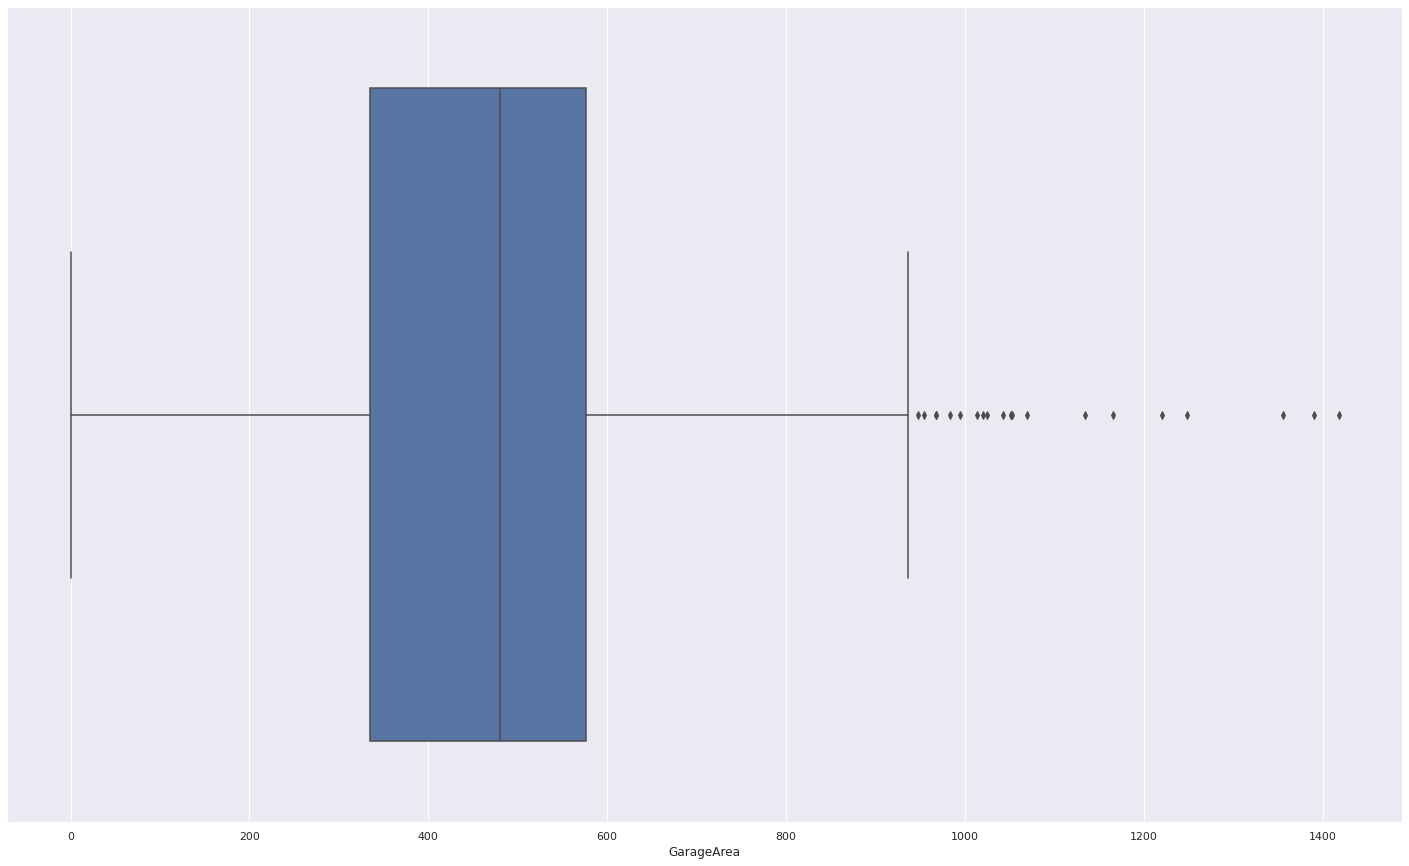

In [47]:
sns.boxplot(df_float_int['GarageArea']);

In [55]:
# IQR
Q1_1 = np.percentile(df_float_int['GrLivArea'], 25,
                   interpolation = 'midpoint')
 
Q3_1 = np.percentile(df_float_int['GrLivArea'], 75,
                   interpolation = 'midpoint')

/tmp/ipykernel_29603/4142382810.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1_1 = np.percentile(df_float_int['GrLivArea'], 25,
/tmp/ipykernel_29603/4142382810.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3_1 = np.percentile(df_float_int['GrLivArea'], 75,


In [56]:
# IQR
Q1_2 = np.percentile(df_float_int['LotArea'], 25,
                   interpolation = 'midpoint')
 
Q3_2 = np.percentile(df_float_int['LotArea'], 75,
                   interpolation = 'midpoint')

/tmp/ipykernel_29603/2849534427.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1_2 = np.percentile(df_float_int['LotArea'], 25,
/tmp/ipykernel_29603/2849534427.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3_2 = np.percentile(df_float_int['LotArea'], 75,


In [57]:
# IQR
Q1_3 = np.percentile(df_float_int['GarageArea'], 25,
                   interpolation = 'midpoint')
 
Q3_3 = np.percentile(df_float_int['GarageArea'], 75,
                   interpolation = 'midpoint')

/tmp/ipykernel_29603/2811294958.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1_3 = np.percentile(df_float_int['GarageArea'], 25,
/tmp/ipykernel_29603/2811294958.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3_3 = np.percentile(df_float_int['GarageArea'], 75,


In [59]:
df_sin_outliyers = df_float_int[df_float_int['GrLivArea'].between(Q1_1,Q3_1, inclusive=False)]

/tmp/ipykernel_29603/4035373549.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_sin_outliyers = df_float_int[df_float_int['GrLivArea'].between(Q1_1,Q3_1, inclusive=False)]


In [66]:
len(df_sin_outliyers),len(df_float_int)

(376, 1460)

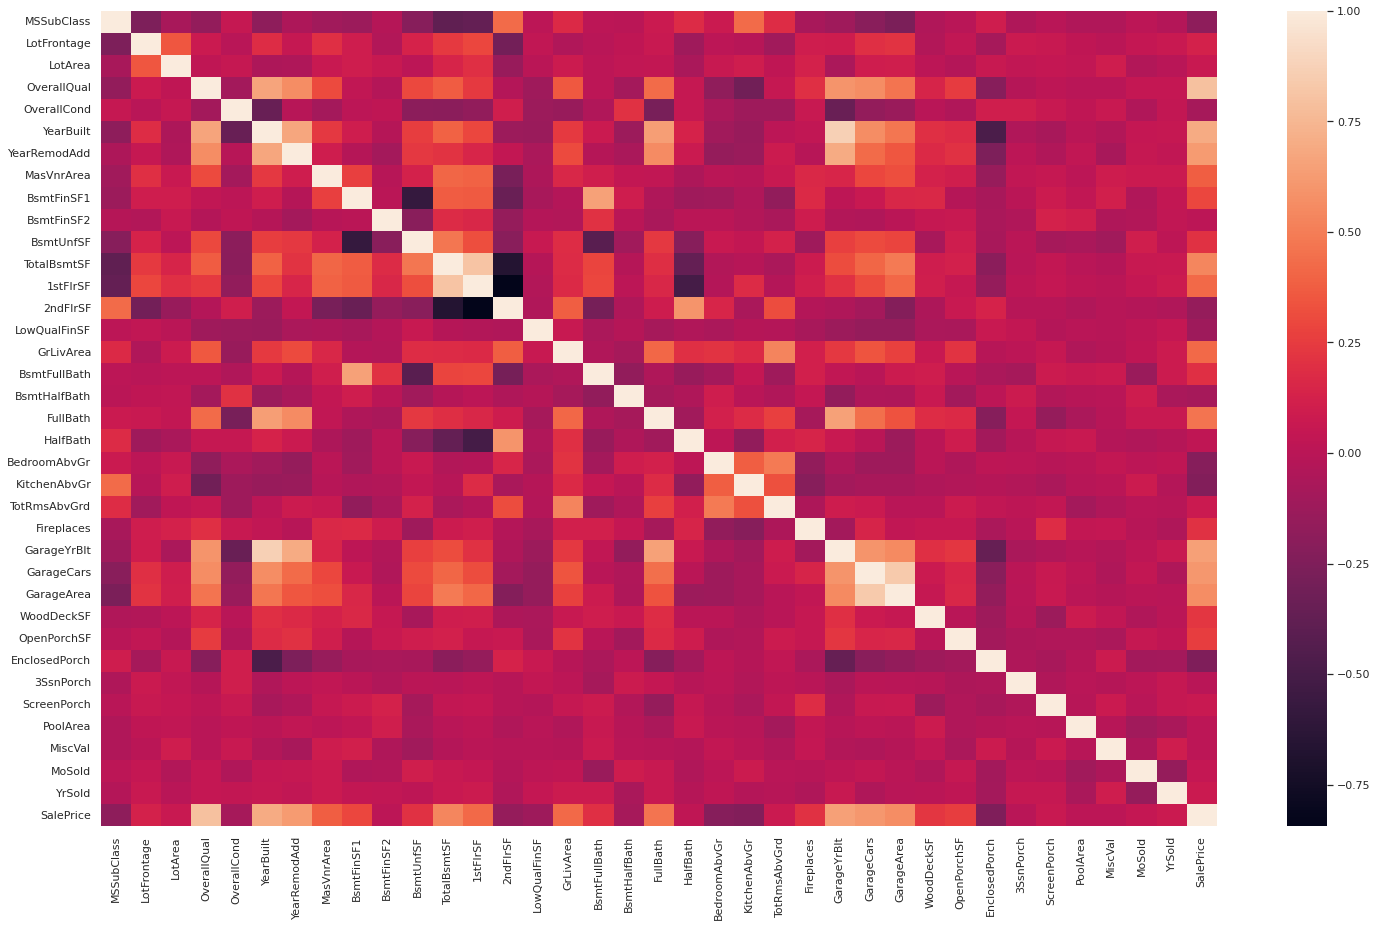

In [67]:
# calculate the correlation matrix
corr = df_sin_outliyers.corr()

# plot the heatmap
sns.set(rc = {'figure.figsize':(25,15)})

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

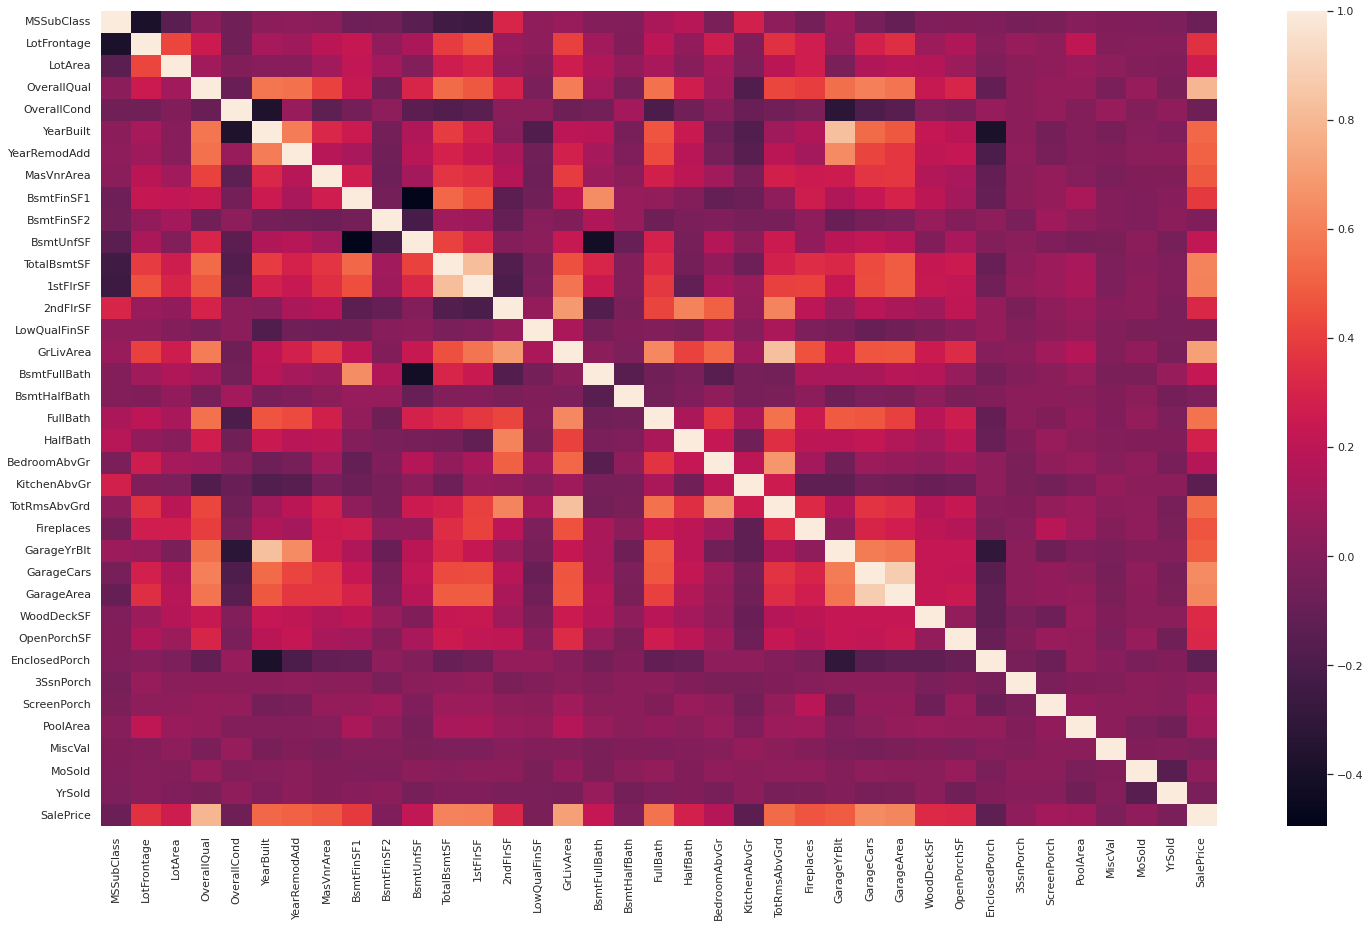

In [68]:
# calculate the correlation matrix
corr = df_float_int.corr()

# plot the heatmap
sns.set(rc = {'figure.figsize':(25,15)})

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

Al eliminar los outliyers se observa que la correlacion se acerca a cero. Se deberian eliminar menos registros.